In [1]:

import sys
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
# Get the absolute path of the current script's directory
current_dir = os.path.dirname(os.path.abspath("g4gLSTM.ipynb"))

# Get the absolute path of the parent directory (project_folder)
parent_dir = os.path.dirname(current_dir)

# Add the parent directory to the Python path
sys.path.append(parent_dir)


from FNN1_1 import baseline_deviation, baeline_out_deviation, baseline_long_deviation, baseline_relError, absSum
baseline_out_deviation = baeline_out_deviation
print(f"Here they are: {baseline_deviation}, {baseline_out_deviation}, {baseline_long_deviation}, {baseline_relError}")
# Now you can import from GetXY.py
from GetXY import x_train, y_train, x_val, y_val, x_test, y_test, out_x_test, out_y_test, long_x_test, long_y_test, outsideExpr, absSum

2025-11-08 14:37:07.825418: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:00:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-11-08 14:37:07.879465: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:00:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-11-08 14:37:07.879673: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:00:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-11-08 14:37:07.881958: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:00:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-11-08 14:37:07.882138: I external/local_xla/xla/stream_executor

Epoch 1/200


I0000 00:00:1762609031.816507  121921 service.cc:145] XLA service 0xfffe64007aa0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1762609031.816573  121921 service.cc:153]   StreamExecutor device (0): Orin, Compute Capability 8.7
2025-11-08 14:37:11.864001: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-11-08 14:37:12.096974: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 90300


24/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 21.6075

I0000 00:00:1762609032.638149  121921 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 20.3244 - val_loss: 17.4276
Epoch 2/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 16.4403 - val_loss: 16.2792
Epoch 3/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 15.2979 - val_loss: 15.1363
Epoch 4/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 13.9306 - val_loss: 13.5258
Epoch 5/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 12.1102 - val_loss: 11.2863
Epoch 6/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 9.6627 - val_loss: 8.4197
Epoch 7/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.7361 - val_loss: 5.2961
Epoch 8/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.7961 - val_loss: 2.6705
Epoch 9/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.8433 - val_loss: 1.4168
Epoch 10/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.1370 - val_loss: 1.0201
Epoch 11/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9178 - val_loss: 0.8570
Epoch 12/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.79

/home/capybara/Desktop/matura_project_python/github/matura/FNN1_1.py:246: RuntimeWarning: divide by zero encountered in divide
  relativeError = np.where(np.array(y_test) != 0, deviation.flatten() / np.abs(np.array(y_test)), deviation.flatten())


Here they are: 0.02929296649786832, 11.328839396768844, 15.345475817041319, 0.0405685937854541
2 - -1 + 4
2543
7.0

Expressions not in x:
-4 - -5 + -1
True
1457
0.0
15
-4.0
[-5.   1.   1.   0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5
  0.5]


In [2]:
from tensorflow.keras.models import Model
class AttentionLayer(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(AttentionLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        # Trainable weights for attention mechanism
        self.W = self.add_weight(name="att_weight", shape=(input_shape[-1], input_shape[-1]),
                                 initializer="glorot_uniform", trainable=True)
        self.b = self.add_weight(name="att_bias", shape=(input_shape[-1],),
                                 initializer="zeros", trainable=True)
        self.u = self.add_weight(name="att_u", shape=(input_shape[-1],),
                                 initializer="glorot_uniform", trainable=True)

        super(AttentionLayer, self).build(input_shape)

    def call(self, inputs):
        # Score computation
        v = tf.tanh(tf.tensordot(inputs, self.W, axes=1) + self.b)
        vu = tf.tensordot(v, self.u, axes=1)
        alphas = tf.nn.softmax(vu)

        # Weighted sum of input
        output = tf.reduce_sum(inputs * tf.expand_dims(alphas, -1), axis=1)
        return output, alphas

In [3]:
def build_lstm_attention_model(input_shape, lstm_units):
    inputs = keras.Input(shape=(input_shape, 1))
    
    # Bi-LSTM layer
    lstm_out = keras.layers.LSTM(lstm_units, return_sequences=True)(inputs)
    
    # Add Attention layer
    attention_out, attention_weights = AttentionLayer()(lstm_out)
    
    # Final Dense layer
    outputs = keras.layers.Dense(1, activation="linear")(attention_out)
    
    # Define the model
    model = Model(inputs, outputs)

    return model

In [4]:
n_bootstrap = 5
min_neurons = 35
max_neurons = 35
neuron_step = 1
min_layers = 2
max_layers = 2

In [5]:
count = 0
for n in range(min_neurons, max_neurons+1, neuron_step):
    for l in range(min_layers, max_layers+1):
        for b in range(n_bootstrap):
            count += 1

print(count)

5


In [6]:
bootstrap_predsInRange = []
bootstrap_predsOutRange = []
bootstrap_predsLongRange = []
for n in range(min_neurons, max_neurons+1, neuron_step):
    for l in range(min_layers, max_layers+1):
        for b in range(n_bootstrap):
            early_stopping = keras.callbacks.EarlyStopping(
                patience=5,
                min_delta=0.001,
                restore_best_weights=True,
                monitor='mse',
                mode = "min"
            )           
            sample_indices = np.random.choice(len(x_train), size=len(x_train), replace=True)
            x_train_bootstrap = x_train[sample_indices]
            y_train_bootstrap = np.array(y_train)[sample_indices]
            bootstrap_train_dataset = tf.data.Dataset.from_tensor_slices((x_train_bootstrap, y_train_bootstrap)).batch(32)

            #bootstrap_model = build_model(len(x_train[0]), l, n)
            bootstrap_model = build_lstm_attention_model(len(x_train[0]),n)

            bootstrap_model.compile(optimizer = "adam", loss = "mse", metrics=['mse'])
            
            bootstrap_model.fit(
            bootstrap_train_dataset,
            epochs=100,
            verbose=0, # Suppress output
            callbacks=[early_stopping]
            )

            bootstrap_predsInRange.append(bootstrap_model.predict(x_test))
            bootstrap_predsOutRange.append(bootstrap_model.predict(out_x_test))
            bootstrap_predsLongRange.append(bootstrap_model.predict(long_x_test))

bootstrap_predsInRange = np.array(bootstrap_predsInRange)
bootstrap_predsOutRange = np.array(bootstrap_predsOutRange)

bootstrap_predsLongRange = np.array(bootstrap_predsLongRange)

46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [7]:
bootstrap_predsInRange.shape
bootstrap_model.summary()

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 15, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 15, 35)         │         5,180 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention_layer_4               │ [(None, 35), (None,    │         1,295 │
│ (AttentionLayer)                │ 15)]                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            36 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,535 (76.31 KB)

 Trainable params: 6,511 (25.43 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 13,024 (50.88 KB)

In [8]:
num_models = int(bootstrap_predsInRange.shape[0]/n_bootstrap)
mean_modelpredsInRange = []
mean_modelpredsOutRange = []
mean_modelpredsLongRange = []

for model_index in range(num_models):
    model_predsInRange = bootstrap_predsInRange[model_index*n_bootstrap : (model_index+1)*n_bootstrap]
    model_predsOutRange = bootstrap_predsOutRange[model_index*n_bootstrap : (model_index+1)*n_bootstrap]
    model_predsLongRange = bootstrap_predsLongRange[model_index*n_bootstrap : (model_index+1)*n_bootstrap]

    mean_modelpredsInRange.append(np.mean(model_predsInRange, axis = 0))
    mean_modelpredsOutRange.append(np.mean(model_predsOutRange, axis = 0))
    mean_modelpredsLongRange.append(np.mean(model_predsLongRange, axis = 0))

mean_modelpredsInRange = np.array(mean_modelpredsInRange)
mean_modelpredsOutRange = np.array(mean_modelpredsOutRange)
mean_modelpredsLongRange = np.array(mean_modelpredsLongRange)

In [9]:
mean_modelpredsInRange.shape
diff_differences = []
for j in range(mean_modelpredsInRange.shape[0]):
  calc = 0
  for i in range(len(y_test)):
    calc += abs(y_test[i]-mean_modelpredsInRange[j][i])
  diff_differences.append(calc/len(y_test))
print(diff_differences)

rel_diff_differences = []
for j in range(mean_modelpredsInRange.shape[0]):
  calc = 0
  for i in range(len(y_test)):
    if y_test[i] != 0:
        calc += (abs(y_test[i]-mean_modelpredsInRange[j][i])/abs(y_test[i]))
    else:
        calc += abs(y_test[i]-mean_modelpredsInRange[j][i])
  rel_diff_differences.append(calc/len(y_test))
print(rel_diff_differences)

out_diff_differences = []
for j in range(mean_modelpredsOutRange.shape[0]):
  calc = 0
  for i in range(len(out_y_test)):
    calc += abs(out_y_test[i]-mean_modelpredsOutRange[j][i])
  out_diff_differences.append(calc/len(out_y_test))
print(out_diff_differences)

rel_out_diff_differences = []
for j in range(mean_modelpredsOutRange.shape[0]):
  calc = 0
  for i in range(len(out_y_test)):
    if out_y_test[i] != 0:
        calc += (abs(out_y_test[i]-mean_modelpredsOutRange[j][i])/abs(out_y_test[i]))
    else:
        calc += abs(out_y_test[i]-mean_modelpredsOutRange[j][i])
  rel_out_diff_differences.append(calc/len(out_y_test))
print(rel_out_diff_differences)

[array([0.76864356], dtype=float32)]
[array([0.274358], dtype=float32)]
[array([3.6290889], dtype=float32)]
[array([0.3479223], dtype=float32)]


In [10]:
placeholder = absSum(outsideExpr)
diff_out_differences = []
indices_with_placeholder_22 = [i for i, val in enumerate(placeholder) if val == 22] 
for j in range(mean_modelpredsOutRange.shape[0]):
  calc = 0
  for i in indices_with_placeholder_22:
    calc += abs(out_y_test[i]-mean_modelpredsOutRange[j][i])
  diff_out_differences.append(calc/len(indices_with_placeholder_22))

In [11]:
diff_out_relError = []
for j in range(mean_modelpredsOutRange.shape[0]):
  calc = 0
  for i in range(mean_modelpredsOutRange.shape[1]):
    calc += abs((out_y_test[i]-mean_modelpredsOutRange[j][i])/out_y_test[i])
  diff_out_relError.append(calc/mean_modelpredsOutRange.shape[1])


y_test_safe = np.copy(y_test).astype(float) # Ensure float type for division
y_test_safe[y_test_safe == 0] = 1
diff_relError = np.array(diff_differences) / np.array(y_test_safe)

diff_relErrors = (np.array(diff_out_relError) + np.array(diff_relError))/2.0
diff_avRelError = np.mean(diff_relErrors, axis = 1)

In [12]:
diff_long_differences = []
for j in range(mean_modelpredsLongRange.shape[0]):
  calc = 0
  for i in range(200,300):
    calc += abs(long_y_test[i]-mean_modelpredsLongRange[j][i])
  diff_long_differences.append(calc/100)

meow_diff_long_differences = []
for j in range(mean_modelpredsLongRange.shape[0]):
  calc = 0
  for i in range(len(long_y_test)):
    calc += abs(long_y_test[i]-mean_modelpredsLongRange[j][i])
  meow_diff_long_differences.append(calc/len(long_y_test))
print(meow_diff_long_differences)

[array([2.8204567], dtype=float32)]


In [13]:
np.array(diff_differences).shape

(1, 1)

In [14]:
import sys
import os

# Get the absolute path of the current script's directory
current_dir = os.path.dirname(os.path.abspath("transformer0.ipynb"))

# Get the absolute path of the parent directory (project_folder)
parent_dir = os.path.dirname(current_dir)

# Add the parent directory to the Python path
sys.path.append(parent_dir)

from FNN1_1 import baseline_deviation, baeline_out_deviation, baseline_long_deviation, baseline_relError, absSum
baseline_out_deviation = baeline_out_deviation

In [15]:
benchmark = []
for i in range(len(diff_differences)):
  calc = 0
  calc += baseline_deviation / (diff_differences[i]**2)
  calc += baseline_out_deviation / (diff_out_differences[i]**2)
  calc += baseline_long_deviation / (diff_long_differences[i]**2)
  calc += baseline_relError / (diff_avRelError[i]**2)
  benchmark.append(calc/4)
print(benchmark)

[array([1.5604553], dtype=float32)]


In [16]:
num_neurons = (max_neurons - min_neurons) // neuron_step + 1
num_layers = max_layers - min_layers + 1

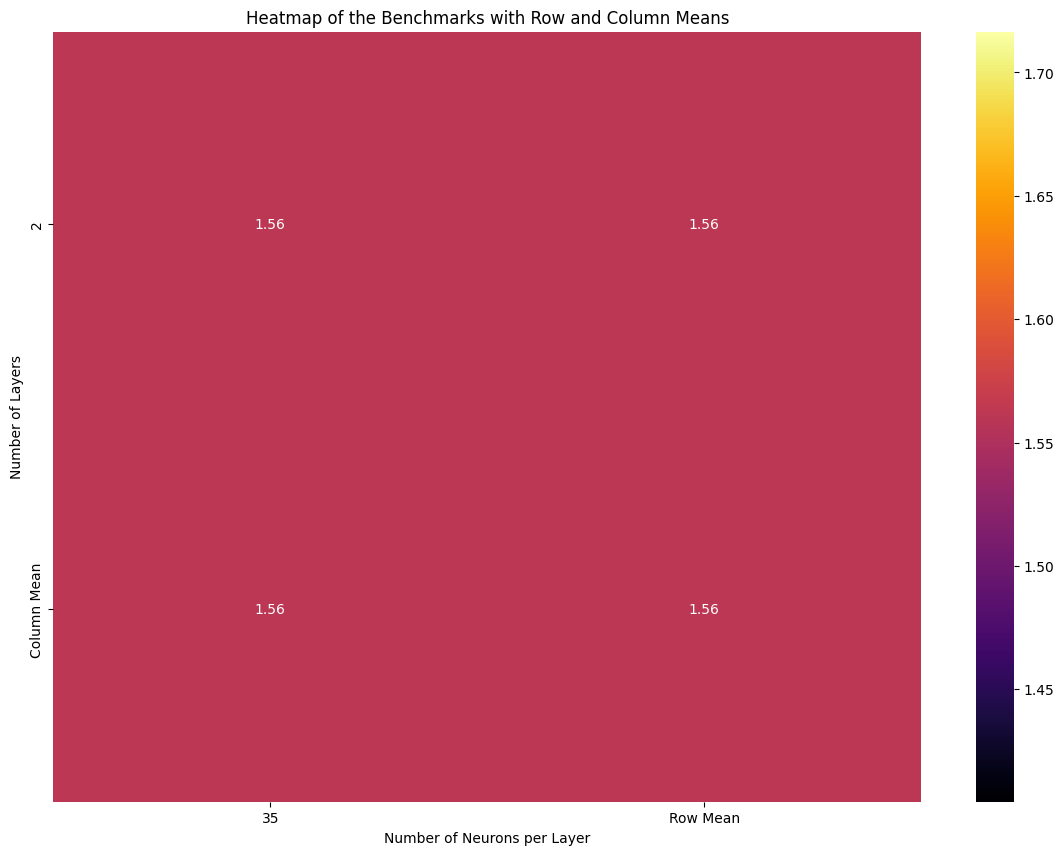

In [17]:
# Create a new array to include the means
# Add a column for row means and a row for column means (and a corner for the overall mean)
benchmark_array = np.array(benchmark).reshape(num_layers, num_neurons)
extended_benchmark_array = np.zeros((num_layers + 1, num_neurons + 1))

Neurons_means = np.mean(benchmark_array, axis=0)
Layers_means = np.mean(benchmark_array, axis=1)

# Copy the original benchmark data
extended_benchmark_array[:num_layers, :num_neurons] = benchmark_array

# Add the row means
extended_benchmark_array[:num_layers, num_neurons] = Layers_means

# Add the column means
extended_benchmark_array[num_layers, :num_neurons] = Neurons_means

# Calculate and add the overall mean
overall_mean = np.mean(benchmark_array)
extended_benchmark_array[num_layers, num_neurons] = overall_mean


# Create updated tick labels for the heatmap
xticklabels_extended = list(np.arange(min_neurons, max_neurons + 1, neuron_step)) + ['Row Mean']
yticklabels_extended = list(np.arange(min_layers, max_layers + 1)) + ['Column Mean']


plt.figure(figsize=(14, 10)) # Adjust figure size for the extra row/column
ax = sns.heatmap(extended_benchmark_array, annot=True, fmt=".2f", cmap="inferno",
            xticklabels=xticklabels_extended,
            yticklabels=yticklabels_extended)
ymin, ymax = ax.get_ylim()
xmin, xmax = ax.get_xlim()
ax.hlines(y=6, xmin=xmin, xmax=xmax, colors='lightblue', lw=2, linestyle='-')
ax.vlines(x=11, ymin=ymin, ymax=ymax, colors='lightblue', lw=2, linestyle='-')
plt.ylabel('Number of Layers')
plt.xlabel('Number of Neurons per Layer')
plt.title('Heatmap of the Benchmarks with Row and Column Means')
plt.savefig("bigHeatmap.png")
plt.show()

In [18]:
import numpy as np
from scipy.stats import ttest_1samp

# Initialize lists to store metrics for each bootstrap run
MAEinRange_list = []
MREinRange_list = []
MAEoutRange_list = []
MREoutRange_list = []
MAElongRange_list = []
benchmarks_list = []

# Loop through the predictions from each bootstrap run
# This assumes the notebook is run with n_bootstrap > 1 for statistical tests
for i in range(n_bootstrap):
    # Extract predictions for the current run
    current_preds_in_range = bootstrap_predsInRange[i]
    current_preds_out_range = bootstrap_predsOutRange[i]
    current_preds_long_range = bootstrap_predsLongRange[i]

    # --- In-Range Metrics ---
    diffInRange = np.abs(y_test - current_preds_in_range.flatten())
    safe_y_test = np.where(np.isclose(y_test, 0.0), 1.0, y_test)
    reldiffInRange = diffInRange / np.abs(safe_y_test)
    
    mean_mae_in_range = np.mean(diffInRange)
    mean_mre_in_range = np.mean(reldiffInRange)
    MAEinRange_list.append(mean_mae_in_range)
    MREinRange_list.append(mean_mre_in_range)

    # --- Out-of-Range Metrics ---
    diffOutRange = np.abs(out_y_test - current_preds_out_range.flatten())
    safe_out_y_test = np.where(np.isclose(out_y_test, 0.0), 1.0, out_y_test)
    reldiffOutRange = diffOutRange / np.abs(safe_out_y_test)

    mean_mae_out_range = np.mean(diffOutRange)
    mean_mre_out_range = np.mean(reldiffOutRange)
    MAEoutRange_list.append(mean_mae_out_range)
    MREoutRange_list.append(mean_mre_out_range)

    # --- Long-Range Metrics ---
    diffLongRange = np.abs(long_y_test - current_preds_long_range.flatten())
    mean_mae_long_range = np.mean(diffLongRange)
    MAElongRange_list.append(mean_mae_long_range)
    
    # --- Benchmark Calculation ---
    # This part replicates the specific slicing and filtering from the notebook for the benchmark score
    
    # Specific filter for out-of-range benchmark calculation (from cell 11)
    placeholder = absSum(outsideExpr)
    indices_with_placeholder_22 = [i for i, val in enumerate(placeholder) if val == 22]
    diffOutRange_for_benchmark_run = []
    for idx in indices_with_placeholder_22:
        diffOutRange_for_benchmark_run.append(np.abs(out_y_test[idx] - current_preds_out_range[idx]))
    
    meanDiff_OutRange_for_benchmark = np.mean(diffOutRange_for_benchmark_run)

    # Specific slice for long-range benchmark calculation (from cell 13)
    diffLongRange_for_benchmark_run = []
    for j in range(200, 300):
         diffLongRange_for_benchmark_run.append(np.abs(long_y_test[j] - current_preds_long_range[j]))

    meanDiff_LongRange_for_benchmark = np.mean(diffLongRange_for_benchmark_run)

    # Calculate the benchmark score for the current run
    benchmark = 0
    benchmark += baseline_deviation / (mean_mae_in_range**2) / 4
    benchmark += baseline_out_deviation / (meanDiff_OutRange_for_benchmark**2) / 4
    benchmark += baseline_long_deviation / (meanDiff_LongRange_for_benchmark**2) / 4
    benchmark += baseline_relError / (mean_mre_out_range**2) / 4 # Using the overall MRE for out-of-range
    benchmarks_list.append(benchmark)

# --- Statistical Analysis and Final Output ---

# Perform one-sample t-test against a population mean of 1.
# Note: A t-test is only meaningful if n_bootstrap > 1.
if n_bootstrap > 1:
    stats1, p_value1 = ttest_1samp(MAEinRange_list, popmean=1)
    stats2, p_value2 = ttest_1samp(MREinRange_list, popmean=1)
    stats3, p_value3 = ttest_1samp(MAEoutRange_list, popmean=1)
    stats4, p_value4 = ttest_1samp(MREoutRange_list, popmean=1)
    stats5, p_value5 = ttest_1samp(MAElongRange_list, popmean=1)
    stats6, p_value6 = ttest_1samp(benchmarks_list, popmean=1)

    print(f"MAE in Range P-value: {p_value1}")
    print(f"MRE in Range P-value: {p_value2}")
    print(f"MAE out Range P-value: {p_value3}")
    print(f"MRE out Range P-value: {p_value4}")
    print(f"MAE long Range P-value: {p_value5}")
    print(f"Benchmark P-value: {p_value6}\n")
else:
    print("Cannot calculate p-values with n_bootstrap=1. Run more bootstraps for statistical tests.\n")


# Print average metrics across all runs
print(f"Average MAE in Range: {np.mean(MAEinRange_list)}")
print(f"Average MRE in Range: {np.mean(MREinRange_list)}")
print(f"Average MAE out Range: {np.mean(MAEoutRange_list)}")
print(f"Average MRE out Range: {np.mean(MREoutRange_list)}")
print(f"Average MAE long Range: {np.mean(MAElongRange_list)}")
print(f"Average benchmark: {np.mean(benchmarks_list)}\n")

# Print the lists of metrics for inspection
print(f"MAE in Range List: {MAEinRange_list}")
print(f"MRE in Range List: {MREinRange_list}")
print(f"MAE out Range List: {MAEoutRange_list}")
print(f"MRE out Range List: {MREoutRange_list}")
print(f"MAE long Range List: {MAElongRange_list}")
print(f"Benchmark List: {benchmarks_list}")

MAE in Range P-value: 0.9704160277916551
MRE in Range P-value: 0.02982194832491984
MAE out Range P-value: 0.032006552383573646
MRE out Range P-value: 0.004111552576025846
MAE long Range P-value: 0.009494680929142123
Benchmark P-value: 0.2407566416738771

Average MAE in Range: 1.0213953357857224
Average MRE in Range: 0.3877413113246085
Average MAE out Range: 3.9917099986720133
Average MRE out Range: 0.41450300850041233
Average MAE long Range: 3.1958687173106837
Average benchmark: 1.868025656554655

MAE in Range List: [0.6903211033111086, 0.30809313053739507, 3.176586190661749, 0.470570535592699, 0.46140571882566034]
MRE in Range List: [0.2651481545059261, 0.13742907001938873, 1.1245530612374277, 0.20581001242200156, 0.2057662584382984]
MAE out Range List: [3.3797280229628086, 2.7142045014479663, 7.671700686041731, 3.0044511616870295, 3.18846562122053]
MRE out Range List: [0.3516941006724351, 0.2567678700848286, 0.8055629262674804, 0.31886974345823216, 0.3396204020190852]
MAE long Range 